In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats
import scipy.special
import sklearn.linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier



In [ ]:
data = pd.read_csv('fraud_dectectionscaled.csv')
data = data.drop(columns = 'Unnamed: 0')
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.00,160296.36,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.00,19384.72,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.00,0.00,21182.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2352350,13268.61,105442.00,92173.39,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2352351,1915.52,5587.00,3671.48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2352352,9735.74,780283.00,770547.26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2352353,3243.52,770547.26,767303.74,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
data = data.dropna()
data

,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Type2_CM
0,9839.64,170136.00,160296.36,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1864.28,21249.00,19384.72,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,181.00,181.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,181.00,181.00,0.00,21182.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2352349,8593.15,50609.00,42015.85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2352350,13268.61,105442.00,92173.39,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2352351,1915.52,5587.00,3671.48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2352352,9735.74,780283.00,770547.26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# class count
class_count_0, class_count_1 = data['Fraud'].value_counts()

# Separate class
class_0 = data[data['Fraud'] == 0]
class_1 = data[data['Fraud'] == 1]# print the shape of the class
print('Fraud 0:', class_0.shape)
print('Fraud 1:', class_1.shape)

Fraud 0: (2350202, 11)
Fraud 1: (2152, 11)


total Fraud of 1 and 0: 0.0    2152
1.0    2152
Name: Fraud, dtype: int64


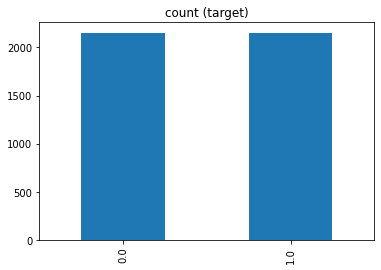

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total Fraud of 1 and 0:",test_under['Fraud'].value_counts())# plot the count after under-sampeling
test_under['Fraud'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
y = test_under.Fraud
X = test_under.drop(columns = ['Fraud'])


In [ ]:
y

617014     0.0
1008935    0.0
593923     0.0
1174321    0.0
1548114    0.0
          ... 
2340339    1.0
2343674    1.0
2343675    1.0
2348202    1.0
2348203    1.0
Name: Fraud, Length: 4304, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
col_names=['Amount','OldbalanceOrg','NewbalanceOrig','OldbalanceDest','NewbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test) 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) #Percentage

Accuracy of logistic regression classifier on test set: 0.91


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[611  56]
 [ 57 568]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       667
         1.0       0.91      0.91      0.91       625

    accuracy                           0.91      1292
   macro avg       0.91      0.91      0.91      1292
weighted avg       0.91      0.91      0.91      1292



In [ ]:
#Function for Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


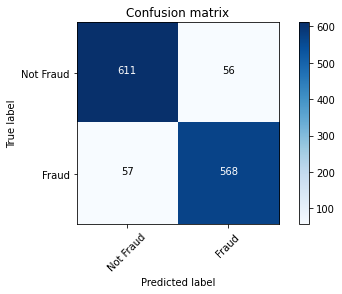

In [ ]:
y_pred=logreg.predict(X_test)

#Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not Fraud','Fraud'])

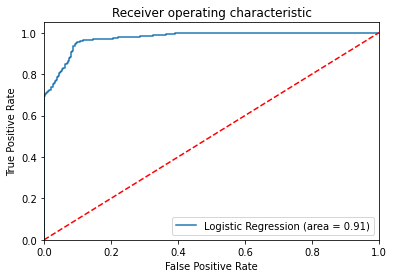

In [ ]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


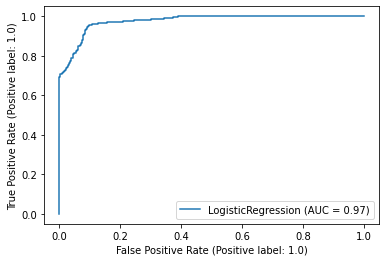

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logreg,X_test,y_test);

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('ROCAUC score:',roc_auc_score(y_test, xgb_y_predict))
print('F1 score:',f1_score(y_test,xgb_y_predict ))



Accuracy score is: 0.9775541795665634
ROCAUC score: 0.9777571214392804
F1 score: 0.976965845909452


In [ ]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.8913307346326836
Accuracy score: 0.8908668730650154
F1 score: 0.8892380204241949
